In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import models

In [5]:
import os, shutil

In [6]:
import pandas as pd
import numpy as np

In [7]:
import plotly.graph_objects as go

In [ ]:
import os
import shutil
from PIL import Image, ImageOps  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
import plotly.graph_objects as go
import plotly.express as px
import datetime
from plotly.offline import init_notebook_mode, iplot
import plotly.io as pio
pio.templates.default = 'plotly_white'
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Concatenate, Flatten, MaxPooling2D, Conv2D
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics
import efficientnet.tfkeras as efn
from tqdm import tqdm_notebook

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

데이터 정리

In [17]:
summary = pd.read_csv('C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\Chest_xray_Corona_dataset_Summary.csv')
df = pd.read_csv('C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\Chest_xray_Corona_Metadata.csv')
print(df.head())

replace_dict = {'Pnemonia':1,
                'Normal':0}
df['Label'] = df['Label'].replace(replace_dict)

train_df = df[df.Dataset_type=='TRAIN']
print(train_df.head())
test_df = df[df.Dataset_type=='TEST']
print(test_df.head())

   Unnamed: 0   X_ray_image_name   Label Dataset_type Label_2_Virus_category  \
0           0  IM-0128-0001.jpeg  Normal        TRAIN                    NaN   
1           1  IM-0127-0001.jpeg  Normal        TRAIN                    NaN   
2           2  IM-0125-0001.jpeg  Normal        TRAIN                    NaN   
3           3  IM-0122-0001.jpeg  Normal        TRAIN                    NaN   
4           4  IM-0119-0001.jpeg  Normal        TRAIN                    NaN   

  Label_1_Virus_category  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
   Unnamed: 0   X_ray_image_name  Label Dataset_type Label_2_Virus_category  \
0           0  IM-0128-0001.jpeg      0        TRAIN                    NaN   
1           1  IM-0127-0001.jpeg      0        TRAIN                    NaN   
2           2  IM-0125-0001.jpeg      0        TRAIN                    NaN   
3           3  IM-0122-0001.jpeg      0  

In [19]:
df_pneumonia = df[df.Label==1]
df_pneumonia_covid = df_pneumonia[df_pneumonia.Label_2_Virus_category=='COVID-19']
pneumonia_covid_images = df_pneumonia_covid.X_ray_image_name.values.tolist()

In [20]:
training_data_path = 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\data\\train\\'
testing_data_path = 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\data\\test\\'

In [21]:
def create_dir():
    try:
        os.makedirs('C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\train\\pneumonia')
        os.makedirs('C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\train\\normal')
        os.makedirs('C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\test\\pneumonia')
        os.makedirs('C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\test\\normal')
    except:
        pass
    
    
def remove_dir():
    try:
        shutil.rmtree('C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\data\\train\\')
        shutil.rmtree('C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\data\\test\\')    
    except:
        pass

In [22]:
train_pneumonia_df = train_df[train_df.Label==1]
train_normal_df = train_df[train_df.Label==0]
test_pneumonia_df = test_df[test_df.Label==1]
test_normal_df = test_df[test_df.Label==0]

In [23]:
create_dir()

training_images_pneumonia = train_pneumonia_df.X_ray_image_name.values.tolist()
training_images_normal = train_normal_df.X_ray_image_name.values.tolist()
testing_images_pneumonia = test_pneumonia_df.X_ray_image_name.values.tolist()
testing_images_normal = test_normal_df.X_ray_image_name.values.tolist()

for image in training_images_pneumonia:
    train_image_pneumonia = os.path.join(training_data_path, str(image))
    shutil.copy(train_image_pneumonia, 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\train\\pneumonia')
    
for image in training_images_normal:
    train_image_normal = os.path.join(training_data_path, str(image))
    shutil.copy(train_image_normal, 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\train\\normal')
    
for image in testing_images_pneumonia:
    test_image_pneumonia = os.path.join(testing_data_path, str(image))
    shutil.copy(test_image_pneumonia, 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\test\\pneumonia')
    
for image in testing_images_normal:
    test_image_normal = os.path.join(testing_data_path, str(image))
    shutil.copy(test_image_normal, 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\test\\normal')

데이터 그려보기

In [28]:
from PIL import Image, ImageOps

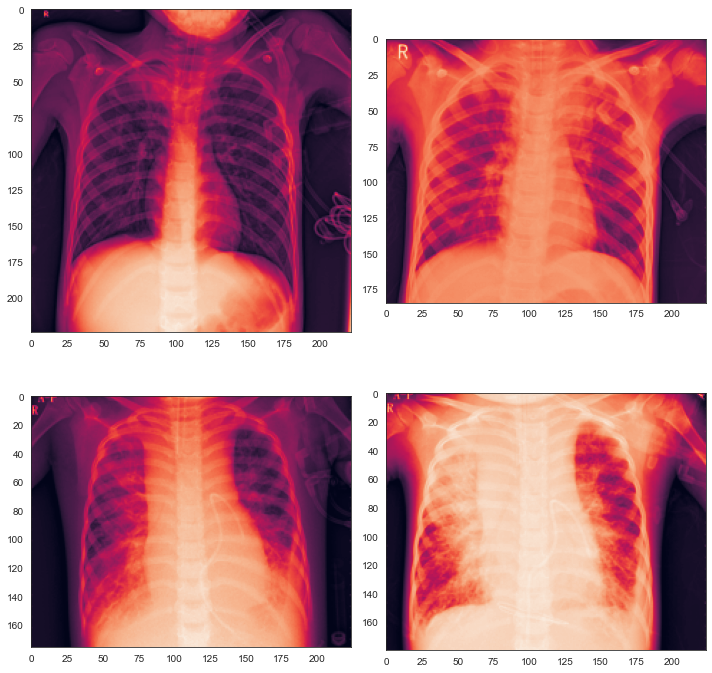

In [32]:
plt.figure(figsize=(10,10))
for index, fn in enumerate(training_images_pneumonia[:4]):
    path = 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\train\\pneumonia\\' + str(fn)
    image = Image.open(path)
    image = ImageOps.grayscale(image)
    image.thumbnail((224,224))
    plt.subplot(2,2,index+1)
    plt.imshow(image)

plt.tight_layout()

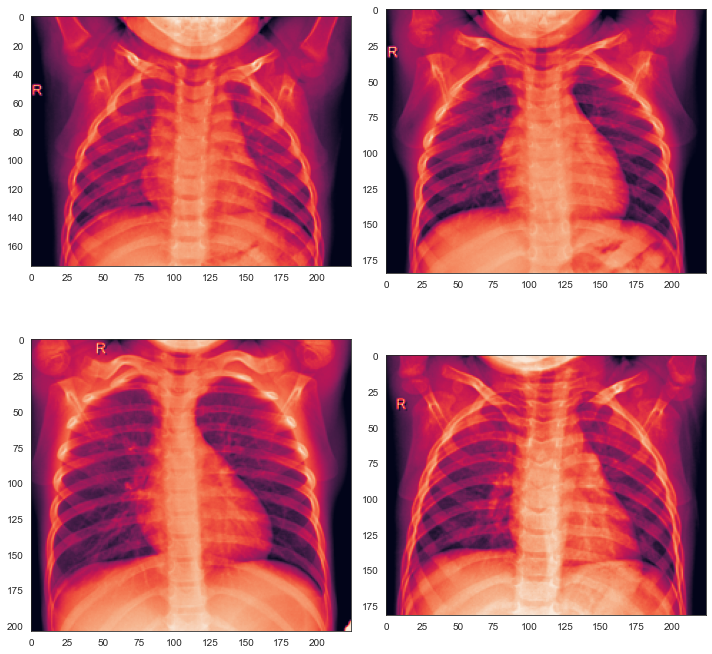

In [35]:
plt.figure(figsize=(10,10))
for index, fn in enumerate(training_images_normal[450:454]):
    path = 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\train\\normal\\' + str(fn)
    image = Image.open(path)
    image = ImageOps.grayscale(image)
    image.thumbnail((224,224))
    plt.subplot(2,2,index+1)
    plt.imshow(image)

plt.tight_layout()

In [37]:
train_normal_dir = 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\train\\normal\\'
train_pneumonia_dir = 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\train\\pneumonia\\'
test_normal_dir = 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\test\\normal\\'
test_pneumonia_dir ='C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\test\\pneumonia\\'
validation_normal_dir = 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\val\\normal\\'
validation_pneumonia_dir ='C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\val\\pneumonia\\'

print('total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total validation pneumonia images:', len(os.listdir(validation_pneumonia_dir)))
print('total validation normal images:', len(os.listdir(validation_normal_dir)))
print('total test pneumonia images:', len(os.listdir(test_pneumonia_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))

total training pneumonia images: 3554
total training normal images: 1108
total validation pneumonia images: 390
total validation normal images: 234
total test pneumonia images: 390
total test normal images: 234


모델

In [38]:
batch_size = 64
img_width, img_height, img_num_channels = 224,224,3
no_epochs = 15
verbosity = 1
input_shape = (img_width, img_height, img_num_channels)

## 소형 합성망 구축

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

손실함수로 이진 교차 엔트로피 이용

In [41]:
from tensorflow.keras import optimizers

In [42]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

데이터 전처리

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
train_dir = 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\train\\'
validation_dir = 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\val\\'

In [45]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=6,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=6,
    class_mode='binary')

Found 4662 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [46]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(6, 224, 224, 3)
(6,)


모델에 적합

In [47]:
history = model.fit_generator(
     train_generator,
     steps_per_epoch=777,
     epochs=30,   
     validation_data=validation_generator,
     validation_steps=104)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 777 steps, validate for 104 steps
Epoch 1/30
777/777 [==============================] - 689s 887ms/step - loss: 0.4160 - acc: 0.8196 - val_loss: 0.4238 - val_acc: 0.8189
Epoch 2/30
777/777 [==============================] - 765s 984ms/step - loss: 0.2032 - acc: 0.9204 - val_loss: 0.1570 - val_acc: 0.9423
Epoch 3/30
777/777 [==============================] - 687s 885ms/step - loss: 0.1280 - acc: 0.9515 - val_loss: 0.1671 - val_acc: 0.9375
Epoch 4/30
777/777 [==============================] - 791s 1s/step - loss: 0.0967 - acc: 0.9674 - val_loss: 0.2495 - val_acc: 0.9295
Epoch 5/30
777/777 [==============================] - 620s 798ms/step - loss: 0.0866 - acc: 0.9740 - val_loss: 0.1058 - val_acc: 0.9567
Epoch 6/30
777/777 [==============================] - 727s 936ms/step - loss: 0.0725 - acc: 0.9749 - val_loss: 0.3985 - val_acc: 0.9087
Epoch 7/30
777/77

모델 저장

In [48]:
model.save('covid1.h5')

정확도

In [49]:
import matplotlib.pyplot as plt

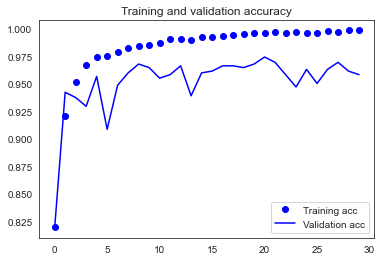

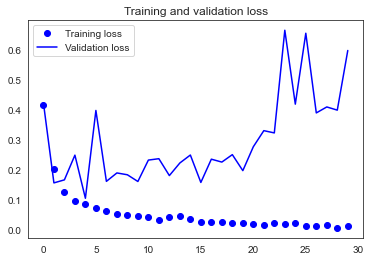

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 데이터 보강

In [51]:
datagen = ImageDataGenerator(
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')

In [52]:
from tensorflow.keras.preprocessing import image

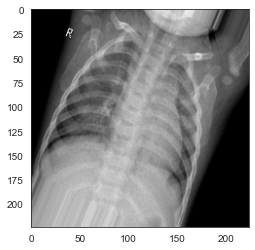

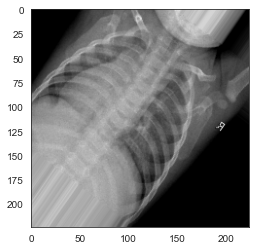

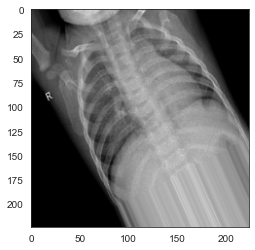

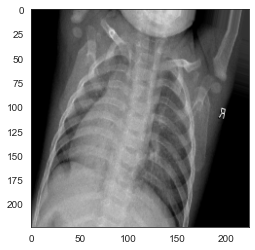

In [57]:
fnames = sorted([os.path.join(train_normal_dir, fname) for fname in os.listdir(train_normal_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [69]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-4),
 metrics=['acc'])

In [70]:
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [71]:
train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(224, 224),
 batch_size=6,
 class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(224,224),
 batch_size=6,
 class_mode='binary')

Found 4662 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [72]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(6, 224, 224, 3)
(6,)


In [73]:
history = model.fit_generator(
     train_generator,
     steps_per_epoch=777,
     epochs=30,   
     validation_data=validation_generator,
     validation_steps=104)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 777 steps, validate for 104 steps
Epoch 1/30
777/777 [==============================] - 791s 1s/step - loss: 0.4063 - acc: 0.8134 - val_loss: 0.3472 - val_acc: 0.8365
Epoch 2/30
777/777 [==============================] - 749s 964ms/step - loss: 0.3179 - acc: 0.8631 - val_loss: 0.3690 - val_acc: 0.8365
Epoch 3/30
777/777 [==============================] - 717s 923ms/step - loss: 0.2942 - acc: 0.8724 - val_loss: 0.3647 - val_acc: 0.8317
Epoch 4/30
777/777 [==============================] - 722s 930ms/step - loss: 0.2812 - acc: 0.8758 - val_loss: 0.4800 - val_acc: 0.7724
Epoch 5/30
777/777 [==============================] - 717s 923ms/step - loss: 0.2598 - acc: 0.8867 - val_loss: 0.7594 - val_acc: 0.5849
Epoch 6/30
777/777 [==============================] - 712s 916ms/step - loss: 0.2648 - acc: 0.8893 - val_loss: 0.3180 - val_acc: 0.8654
Epoch 7/30
777/777 [==============================] - 807s 1s/step - loss: 0.2521 - acc: 0.89

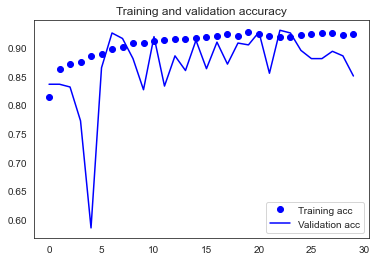

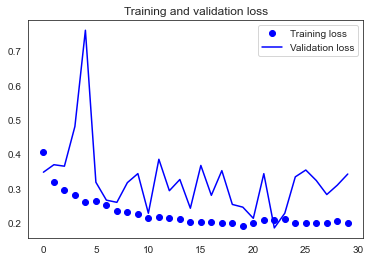

In [74]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [75]:
model.save('covid2.h5')

## 사전 훈련 합성망 사용하기

In [76]:
from tensorflow.keras.applications import VGG16

In [77]:
conv_base = VGG16(weights='imagenet',
 include_top=False,
 input_shape=(224, 224, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

1

In [78]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [83]:
base_dir = 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\cnn2\\'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [80]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 6 

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))    
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
         directory,
         target_size=(224, 224),
         batch_size=batch_size,
         class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [84]:
train_features, train_labels = extract_features(train_dir, 4662)
validation_features, validation_labels = extract_features(validation_dir, 624)
test_features, test_labels = extract_features(test_dir, 624)

Found 4662 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [85]:
train_features = np.reshape(train_features, (4662, 7 * 7 * 512))  
validation_features = np.reshape(validation_features, (624, 7 * 7 * 512))  
test_features = np.reshape(test_features, (624, 7 * 7 * 512))  

In [86]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [87]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512)) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [88]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
 loss='binary_crossentropy',
 metrics=['acc'])

history = model.fit(train_features, train_labels,
 epochs=30,
 batch_size=6,
 validation_data=(validation_features, validation_labels))

Train on 4662 samples, validate on 624 samples
Epoch 1/30
4662/4662 [==============================] - 76s 16ms/sample - loss: 0.1642 - acc: 0.9335 - val_loss: 0.0762 - val_acc: 0.9808
Epoch 2/30
4662/4662 [==============================] - 75s 16ms/sample - loss: 0.0875 - acc: 0.9693 - val_loss: 0.0579 - val_acc: 0.9824
Epoch 3/30
4662/4662 [==============================] - 78s 17ms/sample - loss: 0.0675 - acc: 0.9751 - val_loss: 0.0561 - val_acc: 0.9824
Epoch 4/30
4662/4662 [==============================] - 75s 16ms/sample - loss: 0.0600 - acc: 0.9768 - val_loss: 0.0720 - val_acc: 0.9631
Epoch 5/30
4662/4662 [==============================] - 75s 16ms/sample - loss: 0.0576 - acc: 0.9790 - val_loss: 0.0543 - val_acc: 0.9792
Epoch 6/30
4662/4662 [==============================] - 75s 16ms/sample - loss: 0.0490 - acc: 0.9850 - val_loss: 0.0763 - val_acc: 0.9599
Epoch 7/30
4662/4662 [==============================] - 77s 17ms/sample - loss: 0.0453 - acc: 0.9826 - val_loss: 0.0995 - val

In [89]:
import matplotlib.pyplot as plt

In [90]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

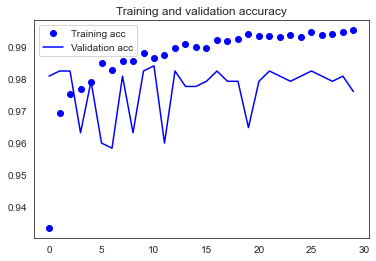

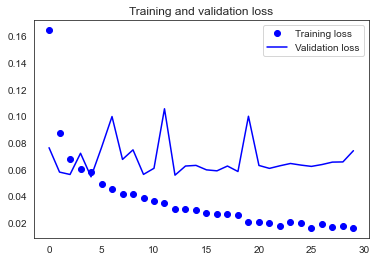

In [91]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

2

In [92]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [93]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 21,137,729
Trainable params: 21,137,729
Non-trainable params: 0
_________________________________________________________________


In [94]:
print("This is the number of trainable weights before freezing","the conv base:", len(model.trainable_weights))
print("This is the number of trainable weights after freezing","the conv base:", len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 30


In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=20,
 width_shift_range=0.1,
 height_shift_range=0.1,
 shear_range=0.1,
 zoom_range=0.1,
 horizontal_flip=True,
 fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(224, 224),
 batch_size=6,
 class_mode='binary')

NameError: name 'ImageDataGenerator' is not defined

In [97]:
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=2e-5),
 metrics=['acc'])

In [ ]:
## 모델이 돌아가는데 너무 오래 걸려 나머지는 못했습니다.

In [1]:
history = model.fit_generator(
 train_generator,
 steps_per_epoch=777,
 epochs=10,
 validation_data=validation_generator,
 validation_steps=104)

NameError: name 'model' is not defined

In [ ]:
model.save('covid3.h5')

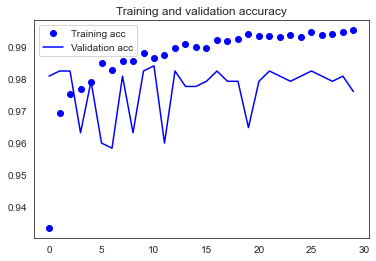

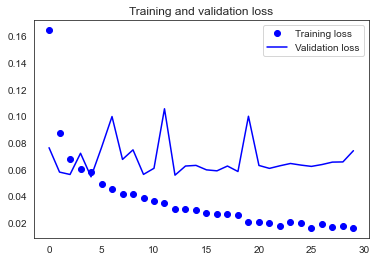

In [99]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

3

In [100]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [101]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [102]:
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-5),
 metrics=['acc'])

In [103]:
history = model.fit_generator(
 train_generator,
 steps_per_epoch=777,
 epochs=30,
 validation_data=validation_generator,
 validation_steps=104)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 777 steps, validate for 104 steps
Epoch 1/30
  4/777 [..............................] - ETA: 50:03 - loss: 0.1649 - acc: 0.9444

KeyboardInterrupt: 

In [ ]:
model.save('covid4.h5') 

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [ ]:
plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
 test_dir,
 target_size=(224, 224),
 batch_size=6,
 class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=104)

print('test acc:', test_acc)